In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_users = pd.read_csv('user_data.csv')
df_logs = pd.read_csv('logs.csv')

Let's see, what the `user data` are:

In [3]:
df_users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
df_users.shape

(2954, 3)

In [5]:
df_users.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
df_users.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [7]:
df_users.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


Repeat the previous steps and take a look at the `log data`:

In [8]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [9]:
df_logs.shape

(4500, 4)

In [10]:
df_logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [11]:
df_logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [12]:
df_logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


***
Which client performed the largest number of successful operations? (`success == True`)

In [13]:
df_clients_by_num_operations = df_logs \
    .groupby('client') \
    .agg({'success': 'sum'}) \
    .rename(columns={'success': 'num_success_operations'}) \
    .sort_values('num_success_operations', ascending=False)
df_clients_by_num_operations.head(10)

,num_success_operations
client,
82563,41
36165,41
52870,41
12179,41
61473,41
78349,41
28719,41
61468,41
92584,41


In [14]:
df_clients_by_num_operations \
    .query('num_success_operations == 41')

,num_success_operations
client,
82563,41
36165,41
52870,41
12179,41
61473,41
78349,41
28719,41
61468,41
92584,41


***
And now let's find out from which `platform` the largest number of successful operations take place?

In [15]:
df_logs \
    .query('success == True') \
    .value_counts(subset=['platform'])[:1]

platform
phone       2019
dtype: int64

***
Well, and which `platform` do `premium` customers prefer?

In [16]:
df_users \
    .query('premium == True') \
    .merge(df_logs, on='client') \
    .value_counts(subset=['platform'])

platform
phone       246
computer    150
tablet       24
dtype: int64

As result shows, premium customers prefer `phone` as a platform for their operations in a landslide.

***
Let's visualize the `age distribution` of customers according to customer type (premium or not):

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

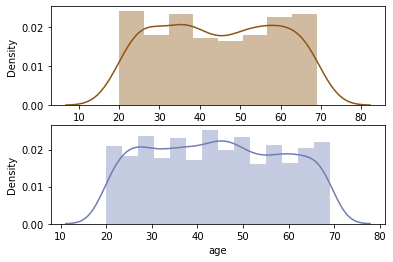

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.distplot(df_users.query('premium == True').age, ax=ax[0], color='#8A5515')
sns.distplot(df_users.query('premium == False').age, ax=ax[1], color='#707DB2')

***
Draw the diagram of distribution of number of successful operations among clients.

C:\Users\natal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_success', ylabel='Density'>

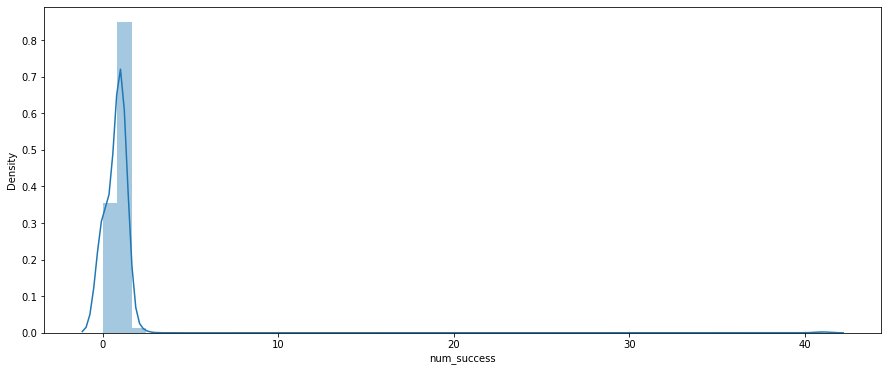

In [32]:
df_by_num_success = df_logs \
                        .groupby('client') \
                        .agg({'success': 'sum'}) \
                        .rename(columns={'success': 'num_success'})

plt.figure(figsize=(15, 6))
sns.distplot(df_by_num_success.num_success)

***
Visualize the number of successful operations performed on the computer platform, depending on age, using sns.countplot (x - age, y - number of successful operations). What is the most successful customer age?

In [25]:
df_success_by_age = df_logs \
    .query('platform =="computer" and success == True') \
    .merge(df_users, on='client') \
    .groupby('age', as_index=False)\
    .agg({'success': 'sum'})

[Text(0.5, 0, 'Client age'), Text(0, 0.5, 'Number of successfull operations')]

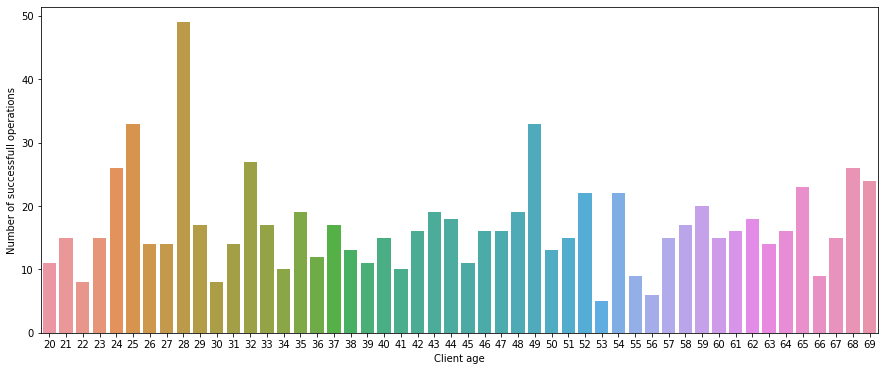

In [29]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x = 'age', y = 'success', data=df_success_by_age)
ax.set(xlabel='Client age', ylabel='Number of successfull operations')